In [1]:
from IPython.display import Image
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
from google.cloud import vision
import io
import warnings
warnings.simplefilter("ignore")
import re
import cv2
import pytesseract
from pytesseract import Output
import os

In [ ]:
import pandas as pd
import numpy as np
from google.cloud import vision
import io
import warnings
warnings.simplefilter("ignore")

In [2]:
# !pip install --upgrade google-cloud-speech
# !pip install google-cloud-vision

In [3]:
# https://cloud.google.com/vision/docs/before-you-begin

In [4]:
img = cv2.imread('./Test_images/3.png')


In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

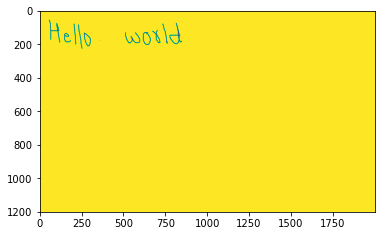

In [7]:
plt.imshow(gray)

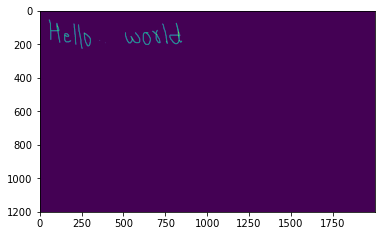

In [8]:
thresh = cv2.threshold(gray,100, 205, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(thresh)

In [11]:
# tell pytesseract where the engine is installed
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'
tessdata_dir_config = '--tessdata-dir "C:\\Program Files (x86)\\Tesseract-OCR\\tessdata"'
def extractTextFromImg(segment):
    text = pytesseract.image_to_string(segment, lang='eng',config=tessdata_dir_config)         
    text = text.encode("gbk", 'ignore').decode("gbk", "ignore")
        
    return text

In [12]:
extractTextFromImg(thresh)

'H eh - mo\n\n'

In [13]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "F:\Projects\Handwritten Digits Recognition\GoogleKey\handwritten-text-recogniser-46cd5a185db2.json"
print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))

Credendtials from environ: F:\Projects\Handwritten Digits Recognition\GoogleKey\handwritten-text-recogniser-46cd5a185db2.json


In [17]:
def CloudVisionTextExtractor(handwritings):
    # convert image from numpy to bytes for submittion to Google Cloud Vision
    _, encoded_image = cv2.imencode('.png', handwritings)
    content = encoded_image.tobytes()
    image = vision.Image(content=content)
    
    # feed handwriting image segment to the Google Cloud Vision API
    client = vision.ImageAnnotatorClient()
    response = client.document_text_detection(image=image)
    
    return response

def getTextFromVisionResponse(response):
    texts = []
    for page in response.full_text_annotation.pages:
        for i, block in enumerate(page.blocks):  
            for paragraph in block.paragraphs:       
                for word in paragraph.words:
                    word_text = ''.join([symbol.text for symbol in word.symbols])
                    texts.append(word_text)

    return ' '.join(texts)

In [19]:
response = CloudVisionTextExtractor(thresh)
handwrittenText = getTextFromVisionResponse(response)
print(handwrittenText)

PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #566841958836 by visiting https://console.developers.google.com/billing/enable?project=566841958836 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=566841958836"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/566841958836"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]